In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate
import pandas as pd

In [3]:
f = np.array([3, 6, 9, 12, 15])*100

In [4]:
def straight_line(x, m, c): return m*x+c
def fit_line(xs, ys):
    popt, pcov = curve_fit(f=straight_line, xdata=xs, ydata=ys)
    xFit = np.arange(min(xs),max(xs)+1e-4, 2e-4)
    m, c = popt[0], popt[1]
    return xFit, straight_line(xFit, m, c), m, pcov[0][0]**0.5

In [26]:
def error(xs, delxs):
    e2 = 0
    for x, delx in zip(xs, delxs):
        # n = 1 if len(param) <= 2 else param[2]
        e2 += (delx/x)**2
    return e2**0.5
def error_avg(delxs):
    n = len(delxs)
    return error(np.zeros(n)+1, delxs)/np.sqrt(n)

# Calibration

### Gain = 50

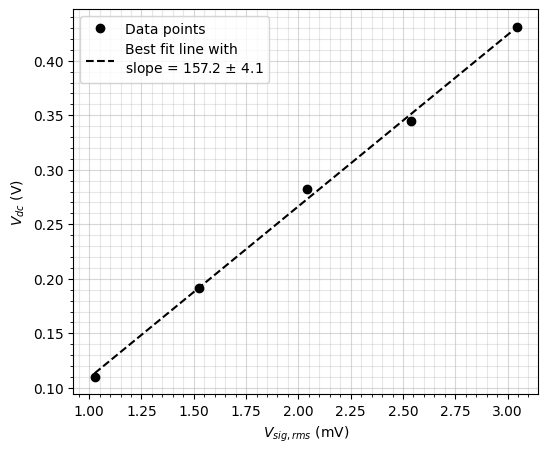

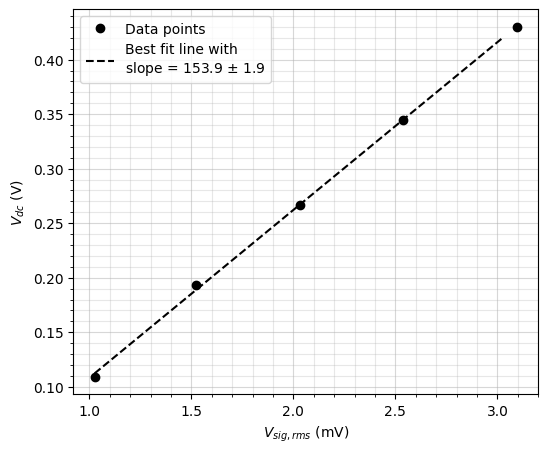

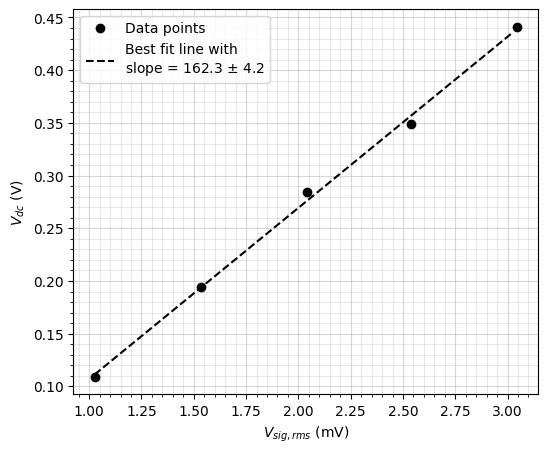

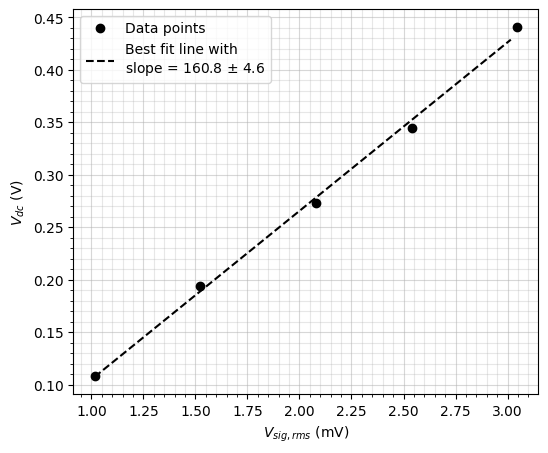

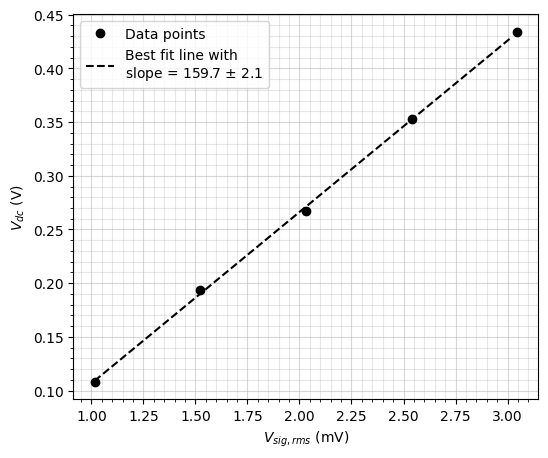

In [42]:
cal50 = pd.read_excel('analysis.xlsx', sheet_name='cal_50')
m50, err50 = [], []
for i in range(0, 25, 5):
    a, b = i, i+5
    plt.figure(figsize=(6,5))
    fits = fit_line(cal50['vsig_rms'][a:b], cal50['vdc'][a:b])
    m50.append(fits[2])
    err50.append(fits[3])
    plt.plot(cal50['vsig_rms'][a:b]*1e3, cal50['vdc'][a:b], 'ko', label='Data points')
    plt.plot(fits[0]*1e3, fits[1], '--k', label=f'Best fit line with\nslope = {round(fits[2],1)} $\pm$ {round(fits[3],1)}')
    plt.xlabel(r'$V_{sig, rms}$ (mV)')
    plt.ylabel(r'$V_{dc}$ (V)')
    plt.legend()
    plt.minorticks_on()
    plt.grid(which='major', alpha=0.5)
    plt.grid(which='minor', alpha=0.3)

In [107]:
headers = ['f', '$\mu$', '$\sigma_{\mu}$']
print(tabulate(np.array([f, np.round(m50, 1), np.round(err50,1)]).transpose(), tablefmt='latex_raw', headers=headers))

\begin{tabular}{rrr}
\hline
    f &   $\mu$ &   $\sigma_{\mu}$ \\
\hline
  300 &   157.2 &              4.1 \\
  600 &   153.9 &              1.9 \\
  900 &   162.3 &              4.2 \\
 1200 &   160.8 &              4.6 \\
 1500 &   159.7 &              2.1 \\
\hline
\end{tabular}


In [44]:
mu50 = np.average(m50)
mu50err = error_avg(err50)
print(f'mu @ 50 gain = {mu50} \pm {mu50err}')

mu @ 50 gain = 158.7801865584268 \pm 3.564161139083535


### Gain = 100

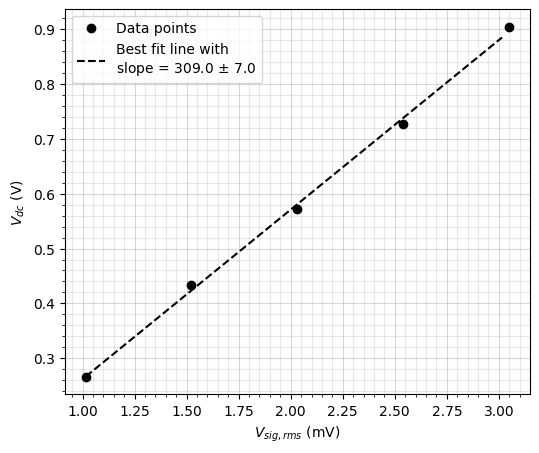

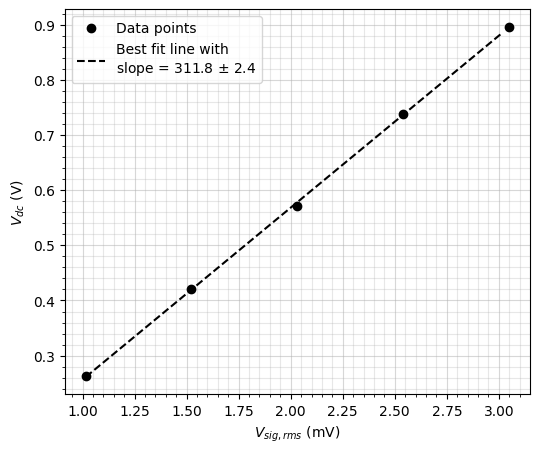

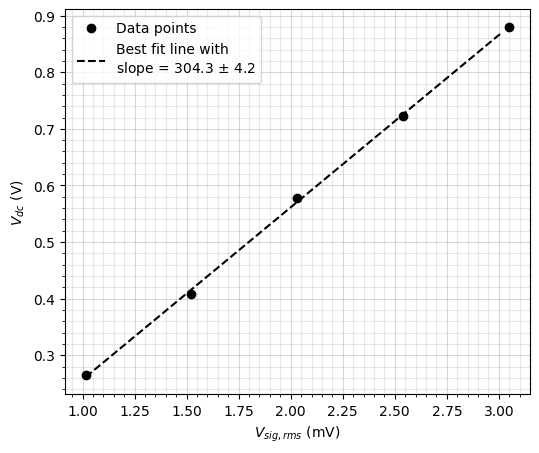

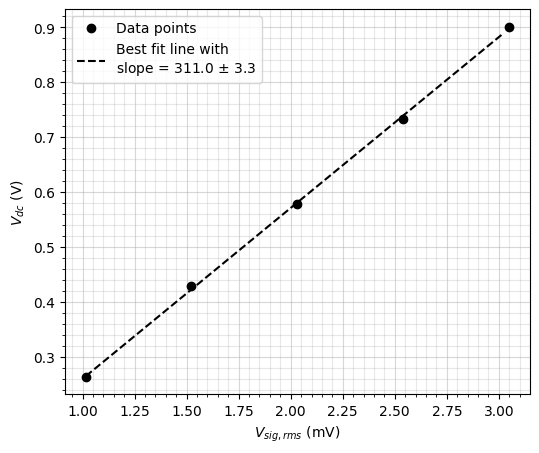

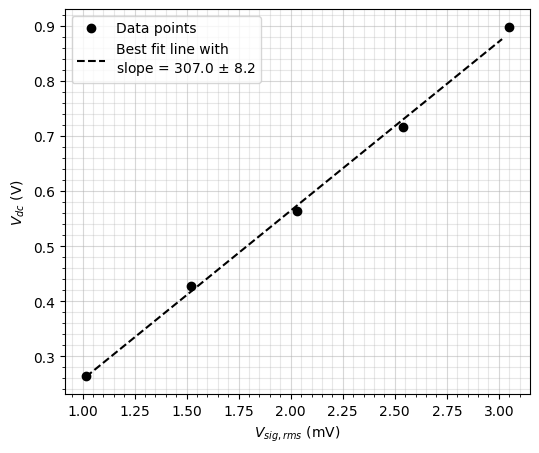

In [5]:
cal100 = pd.read_excel('analysis.xlsx', sheet_name='cal_100')
m100, err100 = [], []
for i in range(0, 25, 5):
    a, b = i, i+5
    plt.figure(figsize=(6,5))
    fits = fit_line(cal100['vsig_rms'][a:b], cal100['vdc'][a:b])
    m100.append(fits[2])
    err100.append(fits[3])
    plt.plot(cal100['vsig_rms'][a:b]*1e3, cal100['vdc'][a:b], 'ko', label='Data points')
    plt.plot(fits[0]*1e3, fits[1], '--k', label=f'Best fit line with\nslope = {round(fits[2],1)} $\pm$ {round(fits[3],1)}')
    plt.xlabel(r'$V_{sig, rms}$ (mV)')
    plt.ylabel(r'$V_{dc}$ (V)')
    plt.legend()
    plt.minorticks_on()
    plt.grid(which='major', alpha=0.5)
    plt.grid(which='minor', alpha=0.3)

In [109]:
print(tabulate(np.array([f, np.round(m100, 1), np.round(err100,1)]).transpose(), tablefmt='latex_raw', headers=headers))

\begin{tabular}{rrr}
\hline
    f &   $\mu$ &   $\sigma_{\mu}$ \\
\hline
  300 &   309   &              7   \\
  600 &   311.8 &              2.4 \\
  900 &   304.3 &              4.2 \\
 1200 &   311   &              3.3 \\
 1500 &   307   &              8.2 \\
\hline
\end{tabular}


In [29]:
mu100 = np.average(m100)
mu100err = error_avg(err100)
print(f'mu @ 100 gain = {mu100} \pm {mu100err}')

mu @ 100 gain = 308.60863620019546 \pm 5.505703963926973


# Determination of low resistance

### Gain = 100

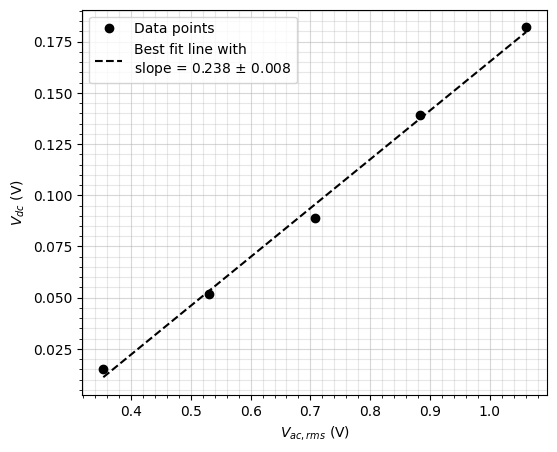

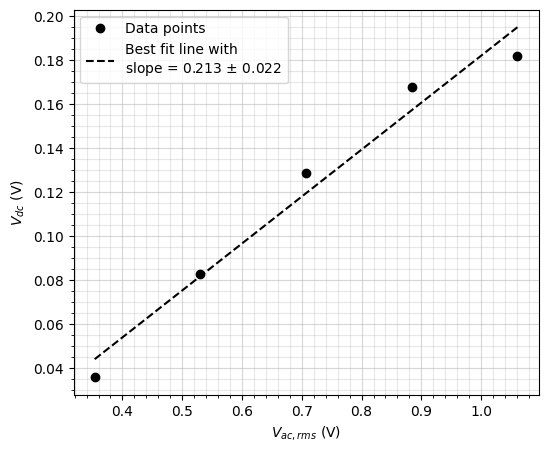

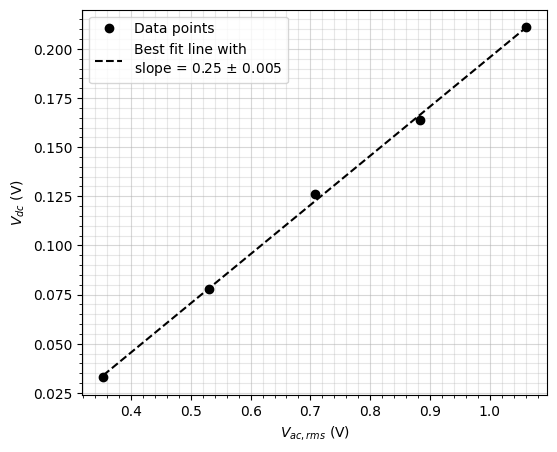

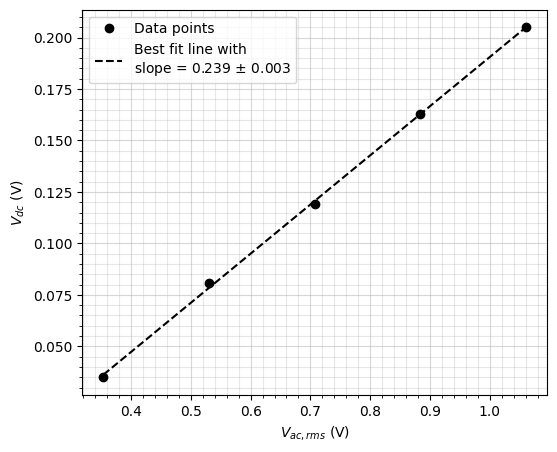

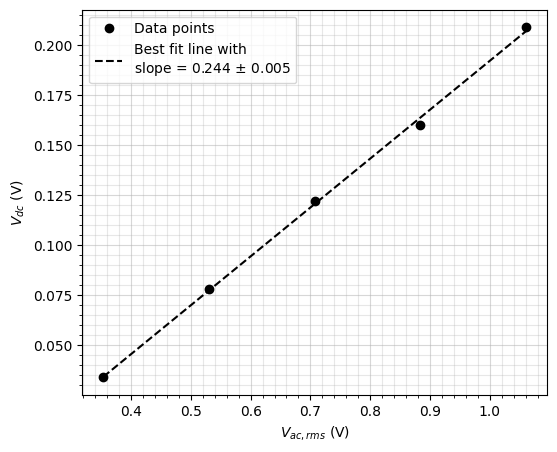

In [37]:
res100 = pd.read_excel('analysis.xlsx', sheet_name='res_100')
r100s, rerr100s = [], []
R = 995/2

for i in range(0, 25, 5):
    a, b = i, i+5
    plt.figure(figsize=(6,5))
    fits = fit_line(res100['vac_rms'][a:b], res100['vdc'][a:b])
    r = fits[2]*(R/mu100)
    err = r*error([mu100, fits[2], R], [mu100err, fits[3], 1])
    r100s.append(r)
    rerr100s.append(err)
    plt.plot(res100['vac_rms'][a:b], res100['vdc'][a:b], 'ko', label='Data points')
    plt.plot(fits[0], fits[1], '--k', label=f'Best fit line with\nslope = {round(fits[2],3)} $\pm$ {round(fits[3],3)}')
    plt.xlabel(r'$V_{ac, rms}$ (V)')
    plt.ylabel(r'$V_{dc}$ (V)')
    plt.legend()
    plt.minorticks_on()
    plt.grid(which='major', alpha=0.5)
    plt.grid(which='minor', alpha=0.3)

In [50]:
r100 = np.average(r100s)
r100err = error_avg(rerr100s)
print(f'r @ gain 100 = {r100} \pm {r100err}')

r @ gain 100 = 0.38191496134577035 \pm 0.018878407637627177


In [39]:
headers = ['$f$', '$r$', '$\delta r$']
print(tabulate(np.array([f, np.round(r100s, 3), np.round(rerr100s,3)]).transpose(), tablefmt='latex_raw', headers=headers))

\begin{tabular}{rrr}
\hline
   $f$ &   $r$ &   $\delta r$ \\
\hline
   300 & 0.384 &        0.015 \\
   600 & 0.344 &        0.035 \\
   900 & 0.403 &        0.01  \\
  1200 & 0.385 &        0.009 \\
  1500 & 0.394 &        0.01  \\
\hline
\end{tabular}


### Gain = 50

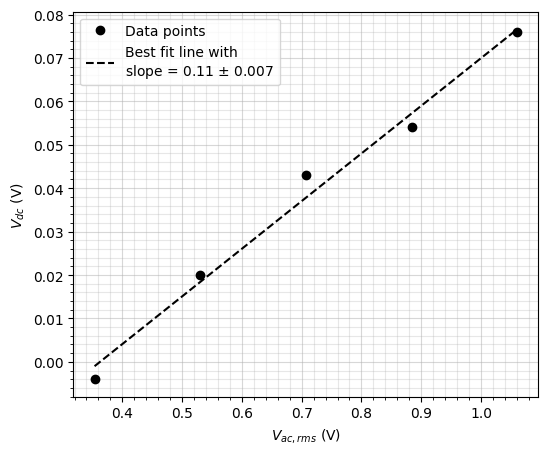

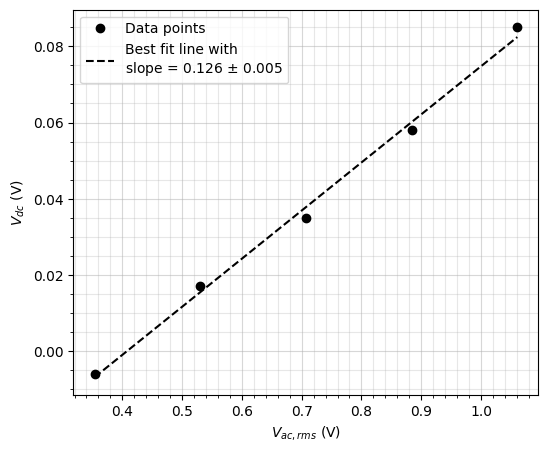

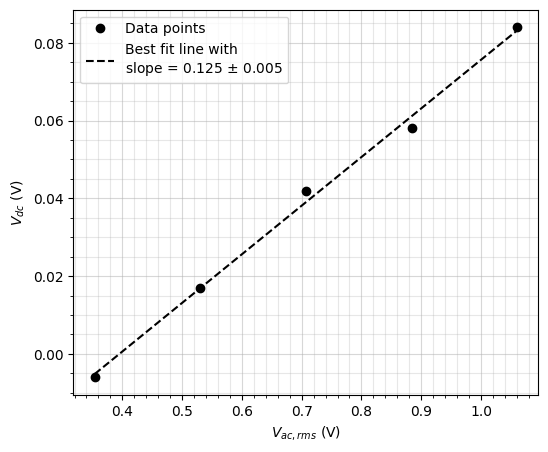

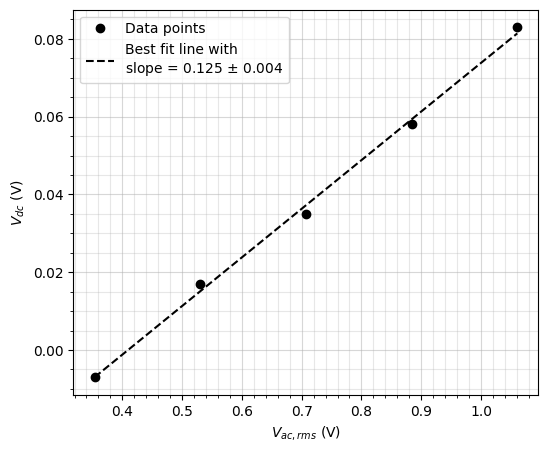

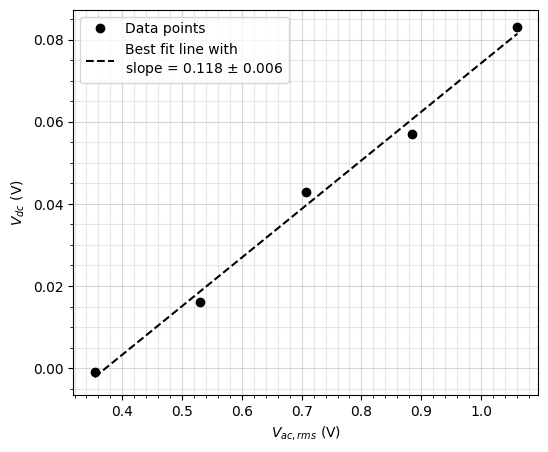

In [46]:
res50 = pd.read_excel('analysis.xlsx', sheet_name='res_50')
r50s, rerr50s = [], []
R = 995/2

for i in range(0, 25, 5):
    a, b = i, i+5
    plt.figure(figsize=(6,5))
    fits = fit_line(res50['vac_rms'][a:b], res50['vdc'][a:b])
    r = fits[2]*(R/mu50)
    err = r*error([mu100, fits[2], R], [mu50err, fits[3], 1])
    r50s.append(r)
    rerr50s.append(err)
    plt.plot(res50['vac_rms'][a:b], res50['vdc'][a:b], 'ko', label='Data points')
    plt.plot(fits[0], fits[1], '--k', label=f'Best fit line with\nslope = {round(fits[2],3)} $\pm$ {round(fits[3],3)}')
    plt.xlabel(r'$V_{ac, rms}$ (V)')
    plt.ylabel(r'$V_{dc}$ (V)')
    plt.legend()
    plt.minorticks_on()
    plt.grid(which='major', alpha=0.5)
    plt.grid(which='minor', alpha=0.3)

In [49]:
r50 = np.average(r50s)
r50err = error_avg(rerr50s)
print(f'r @ gain 50 = {r50} \pm {r50err}')

r @ gain 50 = 0.37859337920137104 \pm 0.017619508370774545


In [48]:
headers = ['$f$', '$r$', '$\delta r$']
print(tabulate(np.array([f, np.round(r50s, 3), np.round(rerr50s,3)]).transpose(), tablefmt='latex_raw', headers=headers))

\begin{tabular}{rrr}
\hline
   $f$ &   $r$ &   $\delta r$ \\
\hline
   300 & 0.344 &        0.023 \\
   600 & 0.395 &        0.016 \\
   900 & 0.392 &        0.015 \\
  1200 & 0.392 &        0.012 \\
  1500 & 0.37  &        0.02  \\
\hline
\end{tabular}


### Final Resistance value

In [52]:
r = (r50+r100)/2
rerr = error_avg([r50err, r100err])
print(f'r = {r} \pm {rerr}')

r = 0.38025417027357067 \pm 0.018259810379084092


# Mutual Inductance

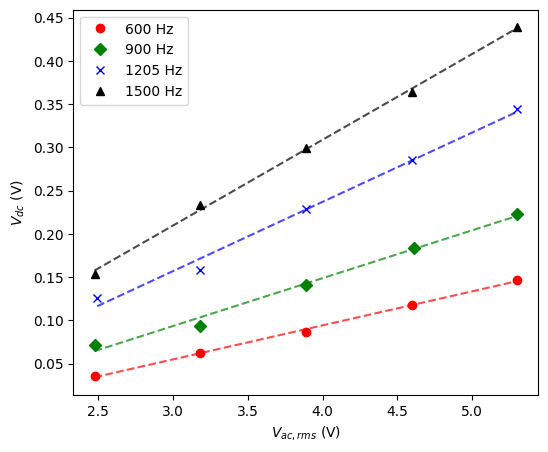

In [ ]:
mutual = pd.read_excel('analysis.xlsx', sheet_name='mutual')
mutual_slope, mutual_error = [], []
plt.figure(figsize=(6,5))
markers = ('ro', 'gD', 'bx', 'k^')
fs = (600,900,1205,1500)
for i in range(0, 20, 5):
    a, b = i, i+5
    fits = fit_line(mutual['vac_rms'][a:b], mutual['vdc'][a:b])
    mutual_slope.append(fits[2])
    mutual_error.append(fits[3])
    plt.plot(mutual['vac_rms'][a:b], mutual['vdc'][a:b], markers[i//4], label=f'{fs[i//4]} Hz')
    plt.plot(fits[0], fits[1], markers[i//4][0]+'--', alpha=0.7)
plt.xlabel(r'$V_{ac, rms}$ (V)')
plt.ylabel(r'$V_{dc}$ (V)')
plt.legend()

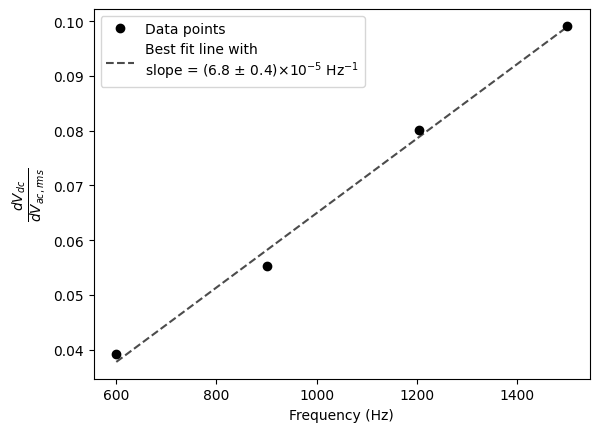

In [54]:
fits_beta = fit_line(fs, mutual_slope)
plt.plot(fs, mutual_slope, 'ko', label='Data points')
slope_lbl = f'Best fit line with\nslope = ({round(fits_beta[2]*1e5,1)} $\pm$ {round(fits_beta[3]*1e5,1)})' + r'$\times 10^{-5}$ Hz$^{-1}$'
plt.plot(fits_beta[0], fits_beta[1], 'k--', alpha=0.7, label=slope_lbl)
plt.ylabel(r'$\frac{dV_{dc}}{dV_{ac, rms}}$', fontsize=14)
plt.xlabel(r'Frequency (Hz)')
plt.legend()

In [ ]:
M = (fits_beta[2]*4800*1e6)/(2*np.pi*mu100)
Merr = M*error([mu100, 4800, fits_beta[2]], [mu100err, 10, fits_beta[3]])
print(f'Mutual inductance = {M} \pm {Merr} \mu H')

Mutual inductance = 168.258817012333 \pm 9.495647386760142 \mu H
